In [1]:
#Importing Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
import random

In [2]:
#Developing dataframes to form input(X_train) and output(y_train) required for the ANN model
df = pd.read_csv("Nasa Battery Data\Battery 5\Discharge cycle\Padded and Resampled\InputData.csv")
X_train = df.drop(columns=['y'])
y_train = df.T.tail(1).T
train_X = X_train.to_numpy()
train_y = y_train.to_numpy()
#Scaling
scaler = MinMaxScaler()
train_Xn = scaler.fit_transform(train_X)
train_yn = scaler.fit_transform(train_y)
df

,1,2,3,4,5,6,7,8,9,10,...,103,104,105,106,107,108,109,110,111,y
0,4.191120,3.963294,3.934353,3.913981,3.892256,3.878959,3.867248,3.853337,3.843842,3.834813,...,3.304941,3.282047,3.254516,3.220691,3.163592,3.109331,3.039221,2.949206,2.866018,1.856487
1,4.189327,3.968040,3.940054,3.920207,3.899267,3.886131,3.874399,3.860394,3.850762,3.841739,...,3.307212,3.281635,3.250605,3.212211,3.165671,3.105633,2.997816,2.878291,2.878291,1.846327
2,4.187692,3.969083,3.941673,3.922065,3.901177,3.888363,3.876732,3.863025,3.853106,3.844131,...,3.301546,3.274130,3.240761,3.198280,3.146813,3.079995,2.995416,2.863920,2.809802,1.835349
3,4.188107,3.970814,3.943664,3.924112,3.903620,3.890490,3.879123,3.865237,3.855485,3.846306,...,3.298972,3.270368,3.236181,3.192320,3.139190,3.069116,2.978743,2.893951,2.893951,1.835263
4,4.187842,3.971287,3.944281,3.925036,3.904507,3.891354,3.880045,3.866069,3.856613,3.847333,...,3.297495,3.268385,3.233130,3.188058,3.110393,3.033504,2.920790,2.875447,2.875447,1.834645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,4.077414,3.912289,3.874488,3.847109,3.825995,3.806503,3.790204,3.777938,3.765984,3.754416,...,2.827322,2.827322,2.827322,2.827322,2.827322,2.827322,2.827322,2.827322,2.827322,1.293464
151,4.076478,3.911137,3.873279,3.845949,3.824861,3.805546,3.789287,3.776995,3.765189,3.753277,...,2.802166,2.802166,2.802166,2.802166,2.802166,2.802166,2.802166,2.802166,2.802166,1.288003
152,4.076545,3.911036,3.873138,3.845779,3.824692,3.805327,3.789045,3.776796,3.764816,3.752932,...,2.790968,2.790968,2.790968,2.790968,2.790968,2.790968,2.790968,2.790968,2.790968,1.287453
153,4.069058,3.910524,3.875702,3.850198,3.830213,3.811618,3.796092,3.784147,3.772762,3.761168,...,2.790443,2.790443,2.790443,2.790443,2.790443,2.790443,2.790443,2.790443,2.790443,1.309015


In [20]:
len(X_train.columns)

111

In [3]:
#Reshaping
train_Xn = train_Xn.reshape(155, 1, 111)
train_Xn.shape[2]
# X_train, X_test, y_train, y_test = train_test_split(train_Xn, train_yn, test_size=0.11)

111

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout

tf.keras.optimizers.Adam(
    learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="adam",
)

model = Sequential()
model.add(LSTM(43, activation='relu', input_shape=(1,len(X_train.columns)), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(43, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(train_yn.shape[1]))

model.compile(optimizer='adam', loss='mse',metrics=tf.metrics.BinaryAccuracy(threshold=0))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 1, 43)             26660     
                                                                 
 dropout_10 (Dropout)        (None, 1, 43)             0         
                                                                 
 lstm_11 (LSTM)              (None, 43)                14964     
                                                                 
 dropout_11 (Dropout)        (None, 43)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 44        
                                                                 
Total params: 41,668
Trainable params: 41,668
Non-trainable params: 0
_________________________________________________________________


In [41]:
#fitting the model to X_train and y_train dataset, and 100 epochs and saving it into history
history = model.fit(train_Xn,train_yn, epochs=100,batch_size=5)

Epoch 1/100
31/31 [==============================] - 3s 4ms/step - loss: 0.1844 - binary_accuracy: 0.0065
Epoch 2/100
31/31 [==============================] - 0s 5ms/step - loss: 0.0355 - binary_accuracy: 0.0065
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0226 - binary_accuracy: 0.0065
Epoch 4/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0160 - binary_accuracy: 0.0065
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0169 - binary_accuracy: 0.0065
Epoch 6/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0180 - binary_accuracy: 0.0065
Epoch 7/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0125 - binary_accuracy: 0.0065
Epoch 8/100
31/31 [==============================] - 0s 5ms/step - loss: 0.0133 - binary_accuracy: 0.0065
Epoch 9/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0133 - binary_accuracy: 0.0065
Epoch 10/100
31/31 [==========================

In [22]:
history.history.keys()

dict_keys(['loss', 'binary_accuracy'])

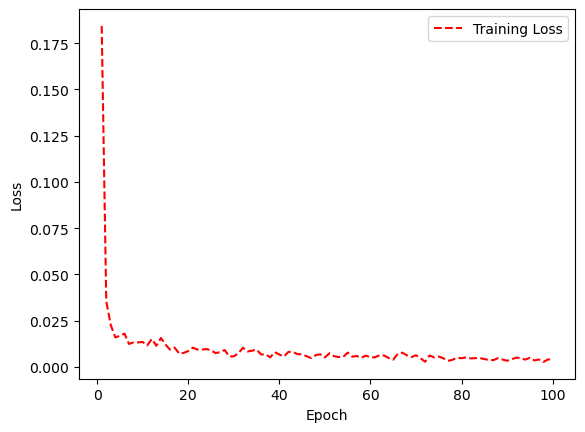

In [42]:
# Using function to get loss history
training_loss = history.history['loss']

# Code for counting the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [43]:
#Using the predict function using the X_train data to obtain y_pred(1024,2) 
#(with 1st column with predicted values of y1 and 2nd column with predicted values of y2)
y_pred = model.predict(train_Xn)
yd_pred = scaler.inverse_transform(y_pred)
print(yd_pred)
print(train_y)


5/5 [==============================] - 1s 4ms/step
[[1.8184992]
 [1.8168039]
 [1.8161719]
 [1.8147922]
 [1.8112273]
 [1.8129998]
 [1.8118321]
 [1.8131024]
 [1.8105091]
 [1.8103421]
 [1.8071741]
 [1.8048354]
 [1.80602  ]
 [1.8033339]
 [1.7994429]
 [1.7952678]
 [1.7980425]
 [1.793708 ]
 [1.791882 ]
 [1.8292345]
 [1.8264627]
 [1.8221585]
 [1.8161676]
 [1.8126757]
 [1.8094556]
 [1.8064238]
 [1.8036768]
 [1.7998012]
 [1.7961885]
 [1.7953542]
 [1.8244829]
 [1.8093811]
 [1.8008995]
 [1.7914789]
 [1.7816709]
 [1.7816739]
 [1.7746017]
 [1.7645088]
 [1.7592001]
 [1.756279 ]
 [1.7518864]
 [1.7466791]
 [1.7591234]
 [1.740677 ]
 [1.729866 ]
 [1.7248749]
 [1.7150487]
 [1.7762142]
 [1.7697835]
 [1.7529007]
 [1.7343681]
 [1.7274557]
 [1.7246389]
 [1.7208159]
 [1.7106118]
 [1.6945548]
 [1.6839958]
 [1.6905489]
 [1.676079 ]
 [1.6745183]
 [1.6584262]
 [1.6542616]
 [1.6547256]
 [1.6399249]
 [1.6387161]
 [1.6324886]
 [1.6189437]
 [1.6199249]
 [1.6168743]
 [1.6072242]
 [1.5983329]
 [1.5912788]
 [1.5935816]


In [44]:
from sklearn.metrics import mean_absolute_error
print('MSE for y: %.3f' % mean_absolute_error(train_yn, yd_pred))

MSE for y: 1.058


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(train_y, y_pred)